In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('C:\\Users\\himel\\Desktop\\sentiment code\\output.csv', delimiter=',', encoding='ISO-8859-1')

# Check the columns in your DataFrame
print(df.head())

   polarity of tweet   id of the tweet             date of the tweet  \
0                   0       1467810672  Mon Apr 06 22:19:49 PDT 2021   
1                   0       1467810917  Mon Apr 06 22:19:53 PDT 2021   
2                   0       1467811184  Mon Apr 06 22:19:57 PDT 2021   
3                   0       1467811193  Mon Apr 06 22:19:57 PDT 2021   
4                   0       1467811372  Mon Apr 06 22:20:00 PDT 2021   

      query           user                                 text of the tweet   
0  NO_QUERY  scotthamilton  is upset that he can't update his Facebook by ...  
1  NO_QUERY       mattycus  @Kenichan I dived many times for the ball. Man...  
2  NO_QUERY        ElleCTF    my whole body feels itchy and like its on fire   
3  NO_QUERY         Karoli  @nationwideclass no, it's not behaving at all....  
4  NO_QUERY       joy_wolf                      @Kwesidei not the whole crew   


In [3]:
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2021,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2021,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2021,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2021,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2021,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.Sentiment.value_counts()

0    799996
4    248576
Name: Sentiment, dtype: int64

In [5]:
import pandas as pd
df['Sentiment'] = df['Sentiment'].replace({4: 1})

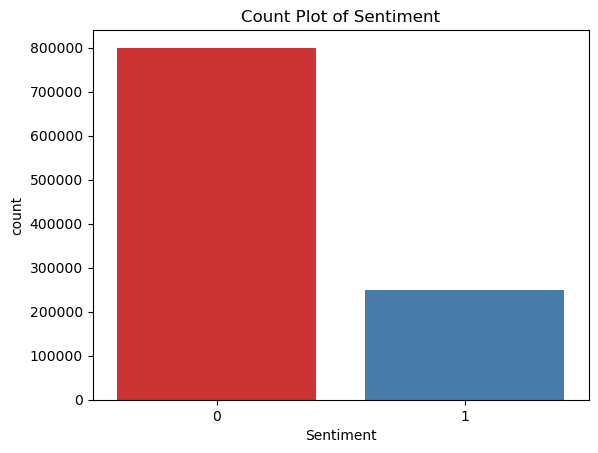

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df["Sentiment"] contains categorical data
sns.countplot(data=df, x="Sentiment", palette="Set1")
plt.title("Count Plot of Sentiment")
plt.show()

In [7]:
from sklearn.utils import resample

In [8]:
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1]

In [9]:
df_minority.shape

(248576, 6)

In [10]:
df_majority.shape

(799996, 6)

In [11]:
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 

In [12]:
df = df_majority_downsampled.append(df_minority)
df.head()

,Sentiment,id,date,query,user,text
74567,0,1694869772,Mon May 04 04:25:52 PDT 2021,NO_QUERY,ainzmcm,Wow slept for almost 12hours. Sleepy me!! Uni ...
668722,0,2246023608,Fri Jun 19 16:59:09 PDT 2021,NO_QUERY,mindlessthinker,gets bored with an idea too easily ... like tw...
286706,0,1993990202,Mon Jun 01 11:14:27 PDT 2021,NO_QUERY,shaybocks,To my girls - sorry i've been a homebody latel...
632911,0,2232834307,Thu Jun 18 20:27:37 PDT 2021,NO_QUERY,angeliqueisrael,BK once again for the weekend...If it wasnt fo...
356735,0,2044389260,Fri Jun 05 09:17:11 PDT 2021,NO_QUERY,Salena,@DonnieWahlberg Now why didn't you do that las...


In [13]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

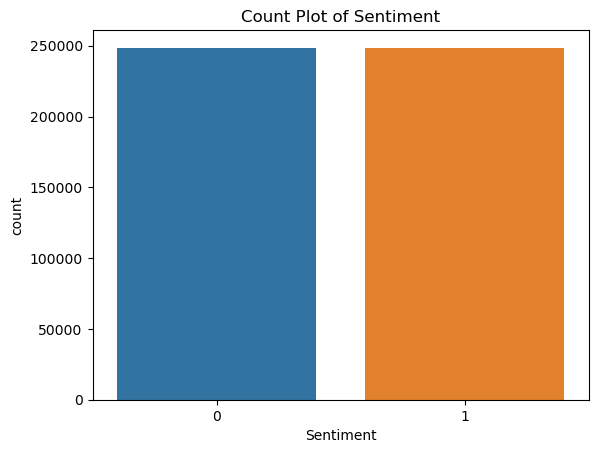

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df["Sentiment"] contains categorical data
sns.countplot(data=df, x="Sentiment")
plt.title("Count Plot of Sentiment")
plt.show

# Data preprocessing

In [15]:

## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

497152
Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house... 


In [16]:
# %%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [17]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [18]:
data_cleaned['Sentiment'].value_counts()

0    248576
1    248576
Name: Sentiment, dtype: int64

In [19]:
data_cleaned.head()

,text,Sentiment
0,wow slept almost hour sleepy uni boo wanna sta...,0
1,get bored idea easily like twitter,0
2,girl sorry homebody lately dont feel well does...,0
3,bk weekend wasnt puppy stay as,0
4,donniewahlberg last night atlanta,0


# EDA

In [20]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[wow, slept, almost, hour, sleepy, uni, boo, w...",0
1,"[get, bored, idea, easily, like, twitter]",0
2,"[girl, sorry, homebody, lately, dont, feel, we...",0
3,"[bk, weekend, wasnt, puppy, stay, as]",0
4,"[donniewahlberg, last, night, atlanta]",0


In [21]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [22]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

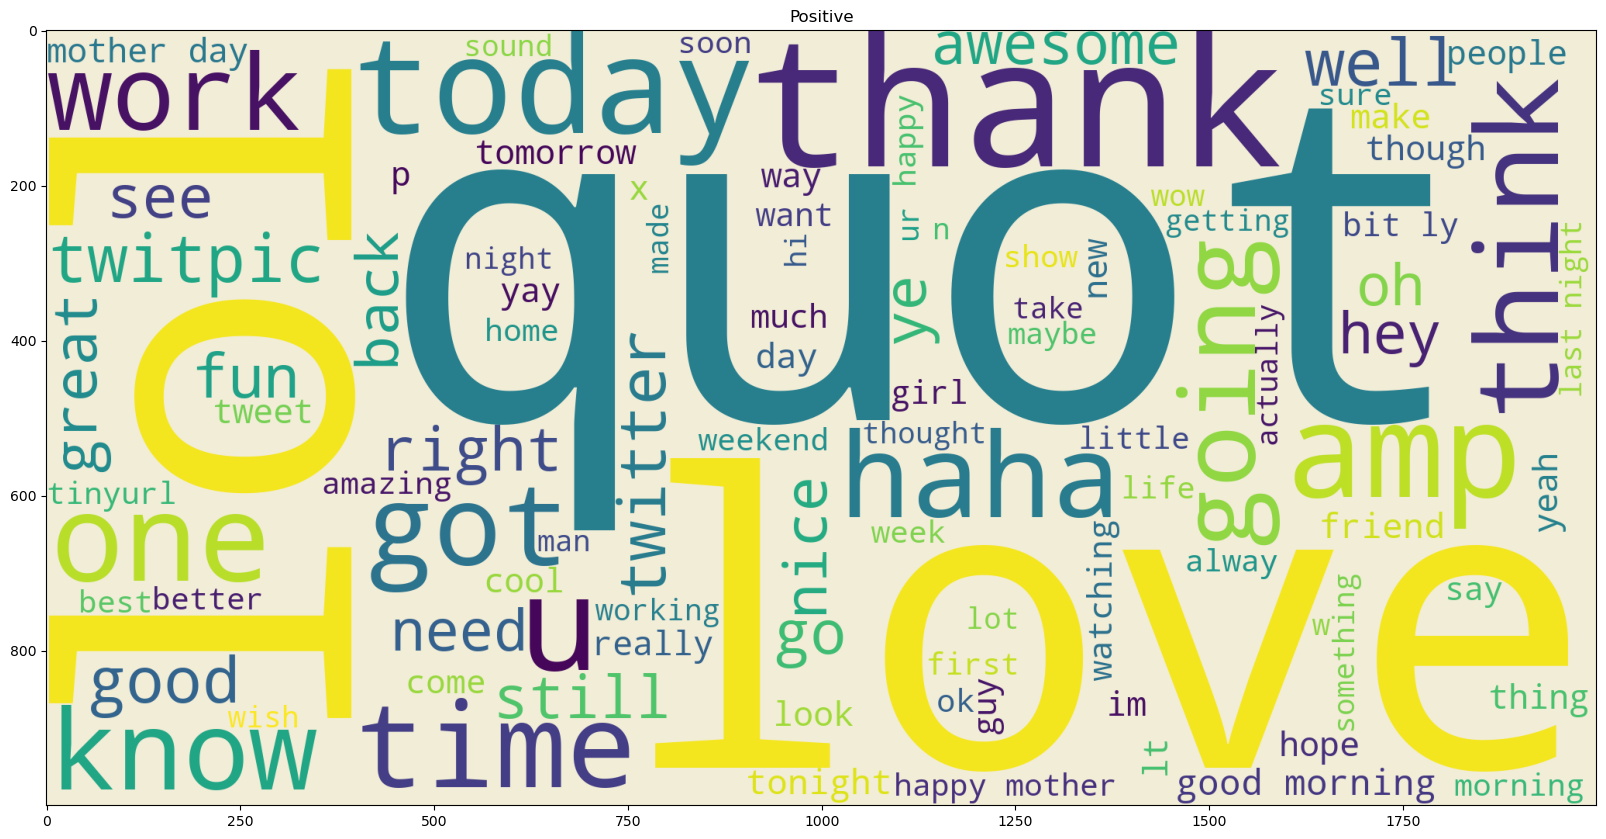

In [23]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

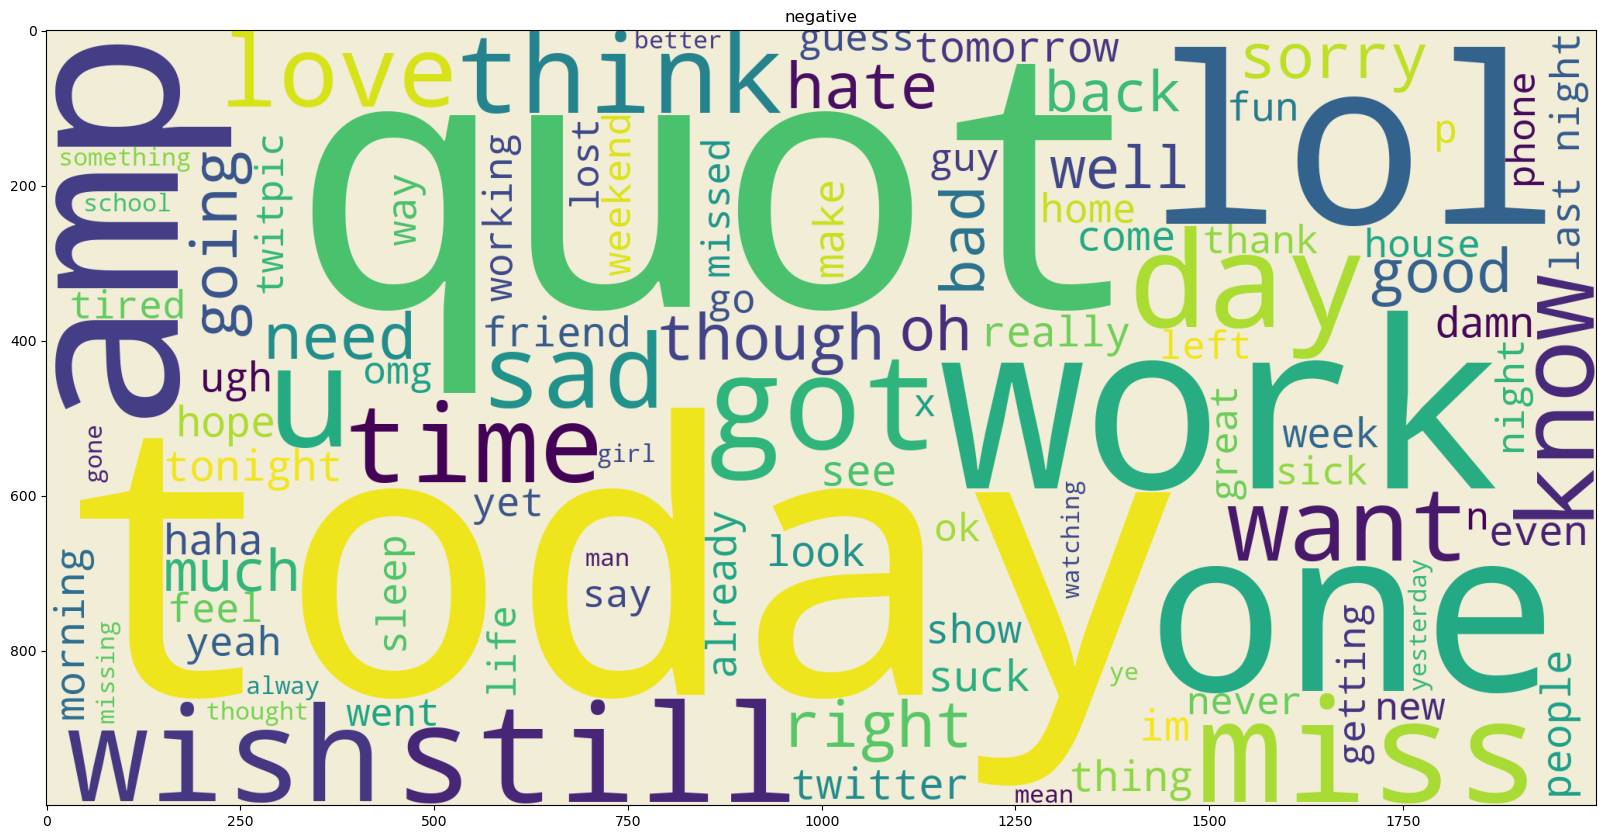

In [24]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# One word count

In [25]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [26]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

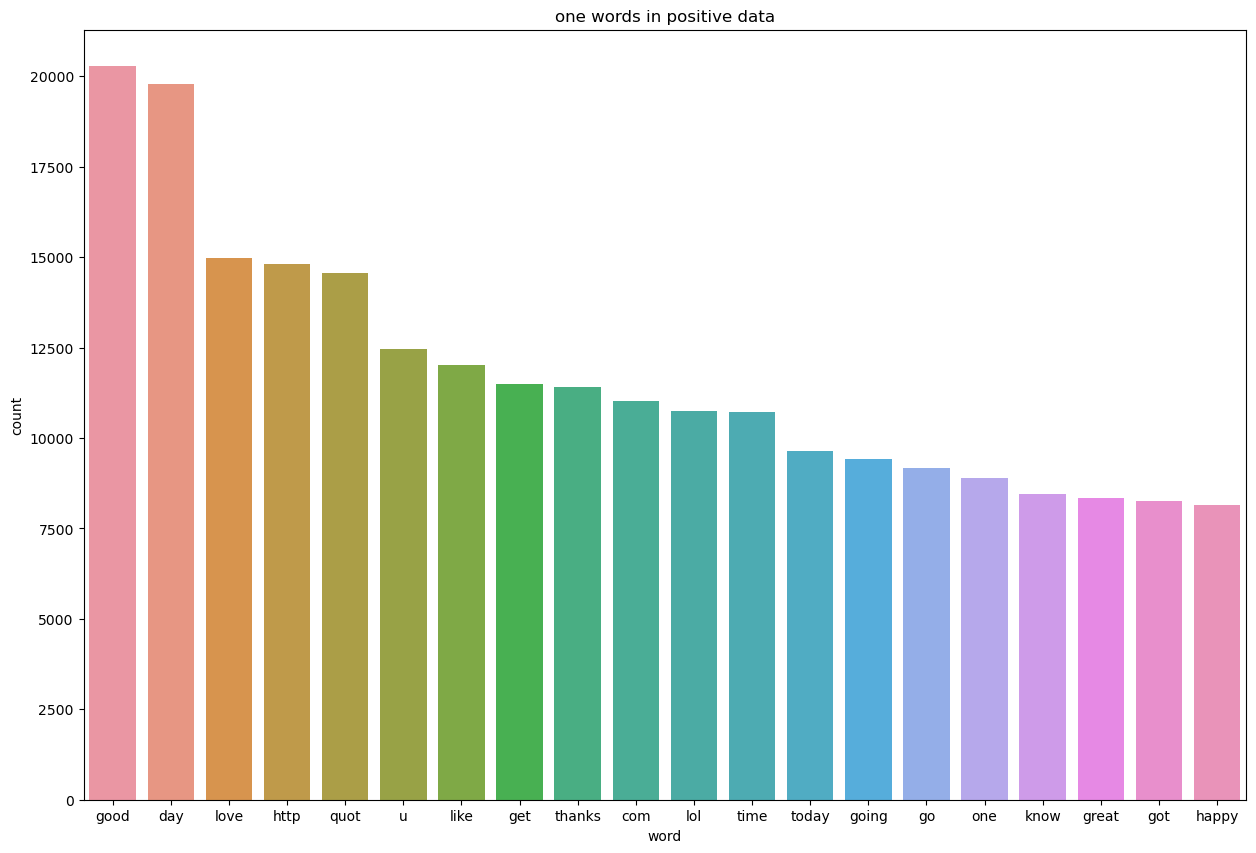

In [27]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

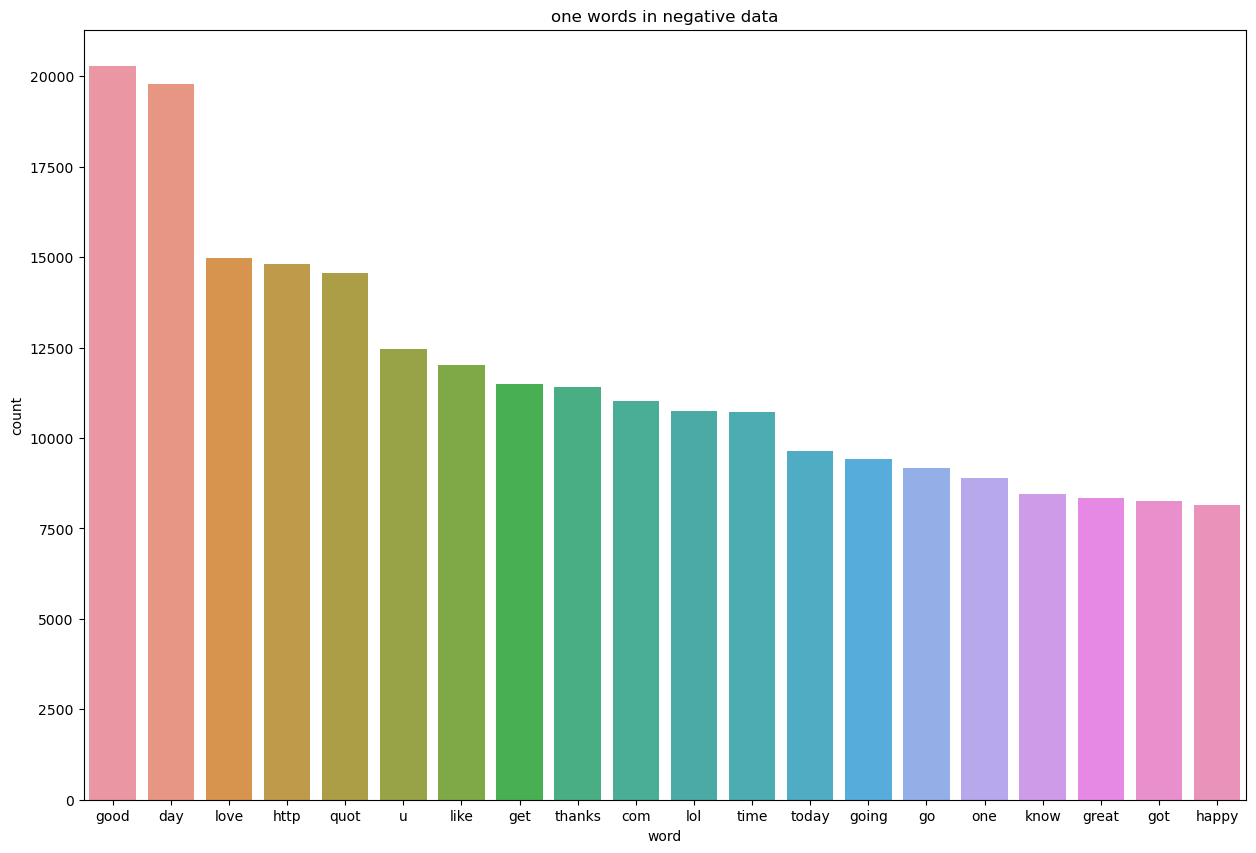

In [28]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

# Naive bayes

In [29]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)

In [30]:
import random

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]

In [31]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 86.0
Testing Accuracy is: 77.0
Most Informative Features
                    iran = True           Negati : Positi =     51.5 : 1.0
                 unhappy = True           Negati : Positi =     45.8 : 1.0
                  farrah = True           Negati : Positi =     40.7 : 1.0
             squarespace = True           Negati : Positi =     33.7 : 1.0
                  booooo = True           Negati : Positi =     33.1 : 1.0
               upsetting = True           Negati : Positi =     28.4 : 1.0
                hayfever = True           Negati : Positi =     26.6 : 1.0
                  boohoo = True           Negati : Positi =     26.4 : 1.0
              jonaskevin = True           Negati : Positi =     24.4 : 1.0
               depressed = True           Negati : Positi =     22.7 : 1.0
None


In [32]:
           # TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [35]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

# Multinomial NB



training accuracy =  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    166545
           1       0.87      0.82      0.85    166546

    accuracy                           0.85    333091
   macro avg       0.85      0.85      0.85    333091
weighted avg       0.85      0.85      0.85    333091



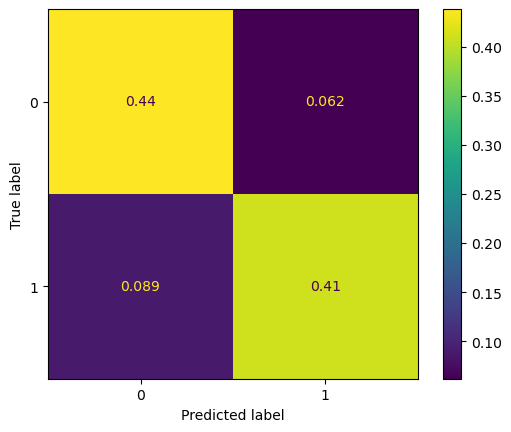

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.78      0.73      0.75     82030

    accuracy                           0.76    164061
   macro avg       0.76      0.76      0.76    164061
weighted avg       0.76      0.76      0.76    164061



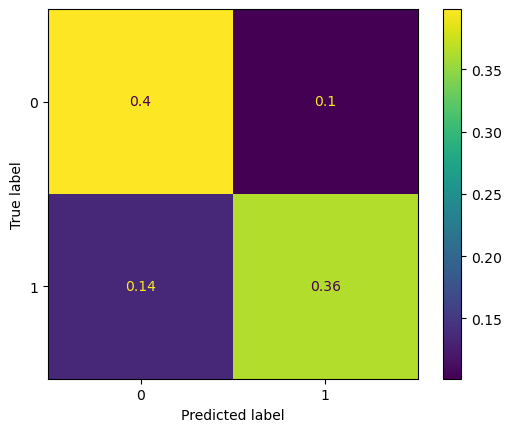

In [36]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

# Linear SVC

training accuracy =  90.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    166545
           1       0.90      0.90      0.90    166546

    accuracy                           0.90    333091
   macro avg       0.90      0.90      0.90    333091
weighted avg       0.90      0.90      0.90    333091



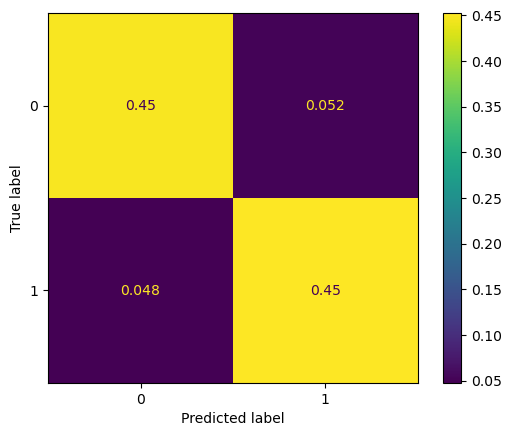

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     82031
           1       0.76      0.78      0.77     82030

    accuracy                           0.77    164061
   macro avg       0.77      0.77      0.77    164061
weighted avg       0.77      0.77      0.77    164061



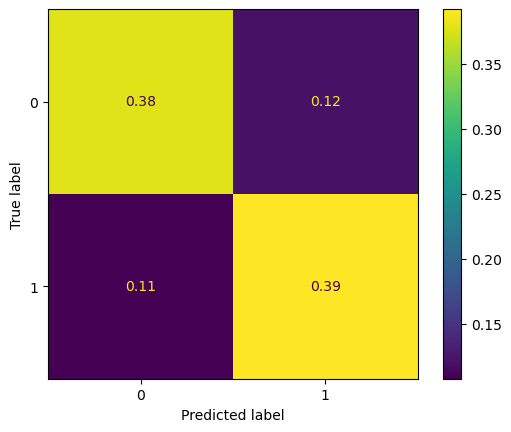

In [37]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

# Logistic regression

training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    166545
           1       0.82      0.84      0.83    166546

    accuracy                           0.83    333091
   macro avg       0.83      0.83      0.83    333091
weighted avg       0.83      0.83      0.83    333091



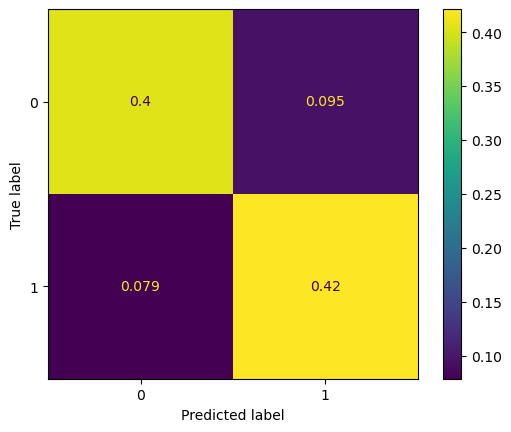

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     82031
           1       0.77      0.80      0.78     82030

    accuracy                           0.78    164061
   macro avg       0.78      0.78      0.78    164061
weighted avg       0.78      0.78      0.78    164061



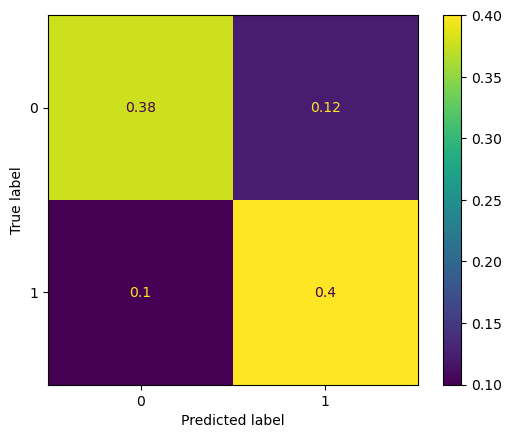

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

# Rnns

In [39]:
import os
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Download NLTK resources
nltk.download('stopwords')

# Read the CSV file
df = pd.read_csv('C:\\Users\\himel\\Desktop\\sentiment code\\output.csv', delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment', 'id', 'date', 'query', 'user', 'text']

# Preprocess the data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = [word for word in text.split() if word not in stop_words]
    return ' '.join(text)

df['text'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Sentiment'], test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # Adjust as needed
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for equal length
max_len = 100  # Adjust as needed
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Encode the target variablejj
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the RNN model
embedding_dim = 50  # Adjust as needed
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_encoded, epochs=2, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/2
10486/10486 [==============================] - 1062s 101ms/step - loss: 0.3842 - accuracy: 0.8289 - val_loss: 0.3704 - val_accuracy: 0.8357
Epoch 2/2
6554/6554 [==============================] - 485s 74ms/step - loss: 0.3655 - accuracy: 0.8386
Test Accuracy: 83.86%


In [40]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('C:\\Users\\himel\\Desktop\\sentiment code\\output.csv', delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment', 'id', 'date', 'query', 'user', 'text']

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply the SentimentIntensityAnalyzer to each tweet and create a new column 'Polarity'
df['Polarity'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize the polarity scores into positive, negative, and neutral
df['Sentiment_Class_Polarity'] = df['Polarity'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Map the raw sentiment labels to 'positive', 'negative', 'neutral'
sentiment_mapping = {0: 'neutral', 2: 'neutral', 4: 'positive'}
df['Sentiment_Class_Label'] = df['Sentiment'].map(sentiment_mapping)

# Count the number of occurrences for each sentiment class based on polarity
polarity_counts = df['Sentiment_Class_Polarity'].value_counts()

# Count the number of occurrences for each sentiment class based on labels
label_counts = df['Sentiment_Class_Label'].value_counts()

# Display the counts
print("Sentiment Counts Based on Polarity:")
print(polarity_counts)

print("\nSentiment Counts Based on Labels:")
print(label_counts)


Sentiment Counts Based on Polarity:
positive    403417
negative    360024
neutral     285131
Name: Sentiment_Class_Polarity, dtype: int64

Sentiment Counts Based on Labels:
neutral     799996
positive    248576
Name: Sentiment_Class_Label, dtype: int64


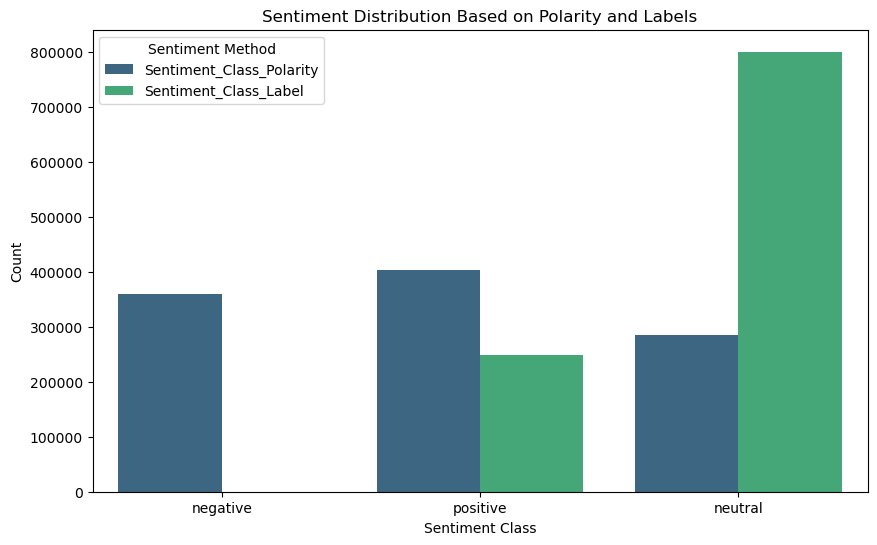

In [41]:
import pandas as pd
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('C:\\Users\\himel\\Desktop\\sentiment code\\output.csv', delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment', 'id', 'date', 'query', 'user', 'text']

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply the SentimentIntensityAnalyzer to each tweet and create a new column 'Polarity'
df['Polarity'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize the polarity scores into positive, negative, and neutral
df['Sentiment_Class_Polarity'] = df['Polarity'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Map the raw sentiment labels to 'positive', 'negative', 'neutral'
sentiment_mapping = {0: 'neutral', 2: 'neutral', 4: 'positive'}
df['Sentiment_Class_Label'] = df['Sentiment'].map(sentiment_mapping)

# Combine the sentiment information
df_combined = pd.concat([df['Sentiment_Class_Polarity'], df['Sentiment_Class_Label']], axis=1)

# Melt the DataFrame for visualization
df_melted = df_combined.melt(var_name='Sentiment Method', value_name='Sentiment Class')

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x='Sentiment Class', hue='Sentiment Method', palette='viridis')
plt.title('Sentiment Distribution Based on Polarity and Labels')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()



# this code should correctly map 0 to 'negative' and 4 to 'positive', and the bar plot should reflect the sentiment distribution based on the corrected mapping.SentimentIntensityAnalyzer from the NLTK library. The compound score from this analyzer represents the overall sentiment polarity of the text. The compound score ranges from -1 (most negative) to 1 (most positive), with values close to 0 indicating a neutral sentiment.

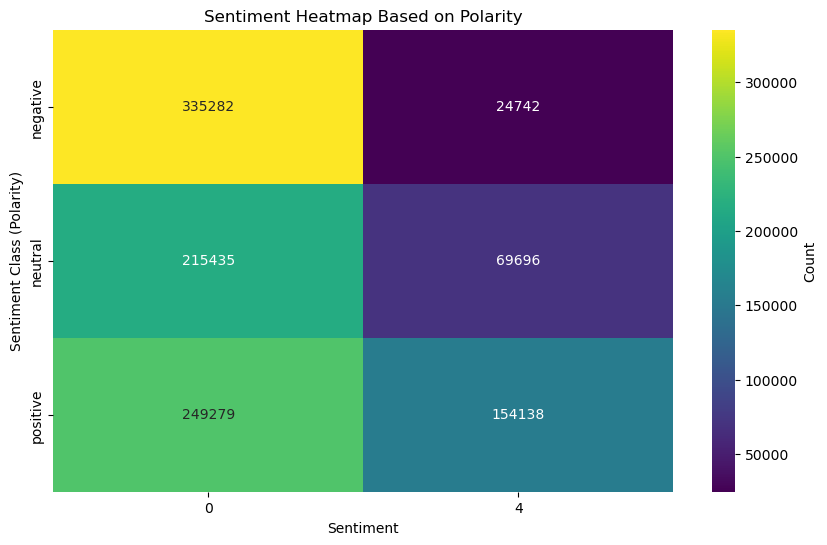

In [46]:
import pandas as pd
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('C:\\Users\\himel\\Desktop\\sentiment code\\output.csv', delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment', 'id', 'date', 'query', 'user', 'text']

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply the SentimentIntensityAnalyzer to each tweet and create a new column 'Polarity'
df['Polarity'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize the polarity scores into positive, negative, and neutral
df['Sentiment_Class_Polarity'] = df['Polarity'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Create a pivot table
heatmap_data = pd.pivot_table(df, values='Polarity', index='Sentiment_Class_Polarity', columns='Sentiment', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Sentiment Heatmap Based on Polarity')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Class (Polarity)')
plt.show()


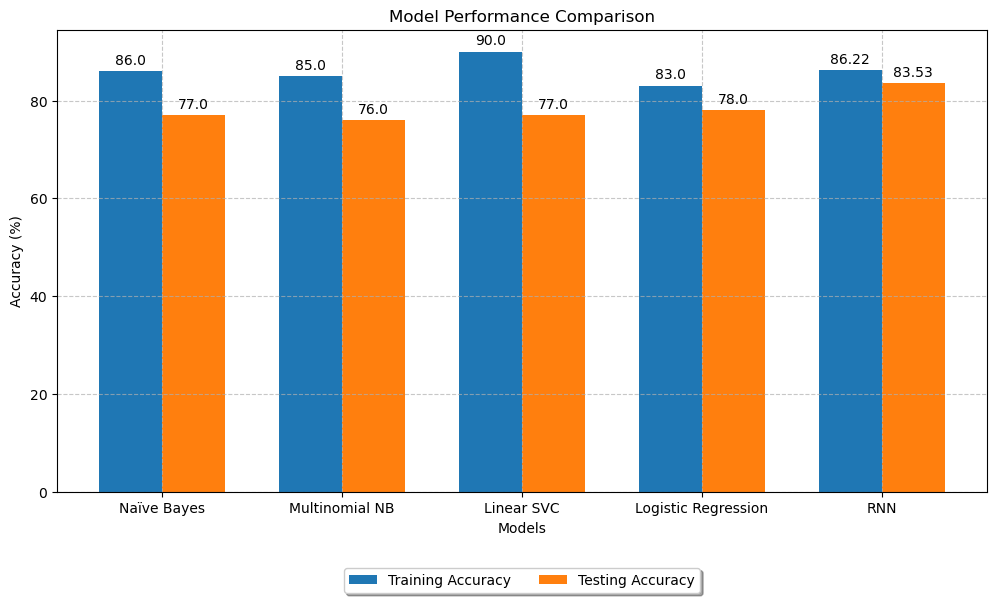

In [77]:
import matplotlib.pyplot as plt

# Data
models = ['Naïve Bayes', 'Multinomial NB', 'Linear SVC', 'Logistic Regression', 'RNN']
training_accuracy = [86.0, 85.0, 90.0, 83.0, 86.22]
testing_accuracy = [77.0, 76.0, 77.0, 78.0, 83.53]

# Bar width
bar_width = 0.35

# Larger figure size
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure width

# Plotting
index = range(len(models))
bar1 = ax.bar(index, training_accuracy, bar_width, label='Training Accuracy')
bar2 = ax.bar([i + bar_width for i in index], testing_accuracy, bar_width, label='Testing Accuracy')

# Add data labels
for bar in [bar1, bar2]:
    for value in bar:
        height = value.get_height()
        ax.annotate('{}'.format(height),
                    xy=(value.get_x() + value.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)', position=(0, 1.02))  # Move the ylabel below the graph

# Move the legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

ax.set_title('Model Performance Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()
